In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
%config InlineBacend.figure_format = 'retina'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno
import re
from datetime import datetime
import seaborn as sns
import squarify
from PIL import Image
from wordcloud import WordCloud , STOPWORDS, ImageColorGenerator
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [4]:
df = pd.read_csv("/content/drive/My Drive/Năm 4/Làm nhóm HK1 2022-2023/Nhóm/Nhóm đồ án/Cloud Computing/DataPipeline/dataset.csv").drop(columns = 'Unnamed: 0', axis = 1)

In [5]:
df.head(10)

,uuid,screen_name,created_at,followers,location,favorite,retweet,source,text,statuses
0,257bd60a-733f-11ed-8e58-cdd0cb8dba8d,BNB_Tracker,2022-12-03 14:33:29,342,NaN,2.0,0.0,Twitter Web App,#BinanceCoin price update: $BNB\n\n#BNB $291....,91973.0
1,0948f928-733d-11ed-8e58-cdd0cb8dba8d,lopp,2022-12-03 15:02:17,423104,Cyberspace,57.0,14.0,Hypefury,Software tend to either get better or get wor...,38675.0
2,ca0f5a41-7338-11ed-8e58-cdd0cb8dba8d,bitcoinrate247,2022-12-03 16:00:02,433,International,0.0,0.0,BtcApp,"Average Bitcoin market price is: USD 16,965.2...",58224.0
3,b7b3fd6b-738e-11ed-8e58-cdd0cb8dba8d,mariama_kromah,2022-12-04 03:35:59,0,NaN,0.0,0.0,Twitter Web App,Pro Bitcoin Trader: Massive Christmas Move Co...,8.0
4,10337d46-7393-11ed-8e58-cdd0cb8dba8d,CryptoDubai912,2022-12-04 04:32:46,591,UAE,1.0,0.0,WordPress.com,#Ethereum Could Fall Under Selling Pressure A...,41597.0
5,136407db-733f-11ed-8e58-cdd0cb8dba8d,Respect7752,2022-12-03 14:43:10,144,NaN,0.0,27.0,Twitter for Android,RT @mustafaavsr54: You still have a chance to...,2566.0
6,e16fe6ba-7392-11ed-8e58-cdd0cb8dba8d,Levi_Petrina30,2022-12-04 02:15:07,75,NaN,0.0,0.0,Twitter for Android,@0xsushi @MajesticBullNFT @mohus_sam @berry_b...,662.0
7,f79e125a-7390-11ed-8e58-cdd0cb8dba8d,LivePriceCrypto,2022-12-04 02:19:50,4083,NaN,0.0,0.0,vaiotapi,#Bitcoin Last Price $16964 #BTC 🚀\nWeekly Ind...,359615.0
8,7cbf9018-738f-11ed-8e58-cdd0cb8dba8d,_bloombot,2022-12-04 04:32:29,1165,NaN,0.0,0.0,NFT Sales Bot by @Sweep_init,754.eth 🔌\nreceived an offer💰 \nfor 12.5183Ξ...,112485.0
9,b4c5a1f3-738c-11ed-8e58-cdd0cb8dba8d,triipme,2022-12-04 04:06:26,14000,Worldwide,2.0,2.0,Twitter for iPhone,We plan to use #Bitcoin integration for #Sust...,4060.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36875 entries, 0 to 36874
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   uuid         36663 non-null  object 
 1   screen_name  36587 non-null  object 
 2   created_at   36587 non-null  object 
 3   followers    36587 non-null  object 
 4   location     18269 non-null  object 
 5   favorite     36475 non-null  float64
 6   retweet      36475 non-null  float64
 7   source       36475 non-null  object 
 8   text         36475 non-null  object 
 9   statuses     36399 non-null  float64
dtypes: float64(3), object(7)
memory usage: 2.8+ MB


In [7]:
df.describe()

,favorite,retweet,statuses
count,36475.000000,36475.000000,3.639900e+04
mean,1.379465,799.969157,4.519436e+04
std,40.936845,4957.696549,1.483694e+05
min,0.000000,0.000000,0.000000e+00
25%,0.000000,0.000000,6.795000e+02
50%,0.000000,8.000000,4.086000e+03
75%,0.000000,195.000000,2.895600e+04
max,6992.000000,81630.000000,3.004251e+06


In [8]:
df.describe(include = "object")

,uuid,screen_name,created_at,followers,location,source,text
count,36663,36587,36587,36587,18269,36475,36475
unique,36557,18775,19660,4074,5107,592,18320
top,0,WSjp_insight,2022-12-03 14:53:07,453,Japan,Twitter for Android,RT @GuardianNigeria: These are the headlines ...
freq,56,1218,91,1223,1256,11597,1131


In [9]:
total = df.isnull().sum().sort_values(ascending=False) #Tìm trong dữ liệu giá null, tính tổng chúng lại, sắp xếp theo tăng dần  = False tức là sắp giảm
percent_1=df.isnull().sum()/df.isnull().count()*100 #Tổng giá trị null của một cột/ số dòng của cột null đó 
percent_2 = (round(percent_1,1)).sort_values(ascending = False) #Làm tròn 1 chữ số và sort giảm dần
missing_data = pd.concat([total,percent_2],axis=1,keys=['Total','%'])
missing_data


,Total,%
location,18606,50.5
statuses,476,1.3
favorite,400,1.1
retweet,400,1.1
source,400,1.1
text,400,1.1
screen_name,288,0.8
created_at,288,0.8
followers,288,0.8
uuid,212,0.6


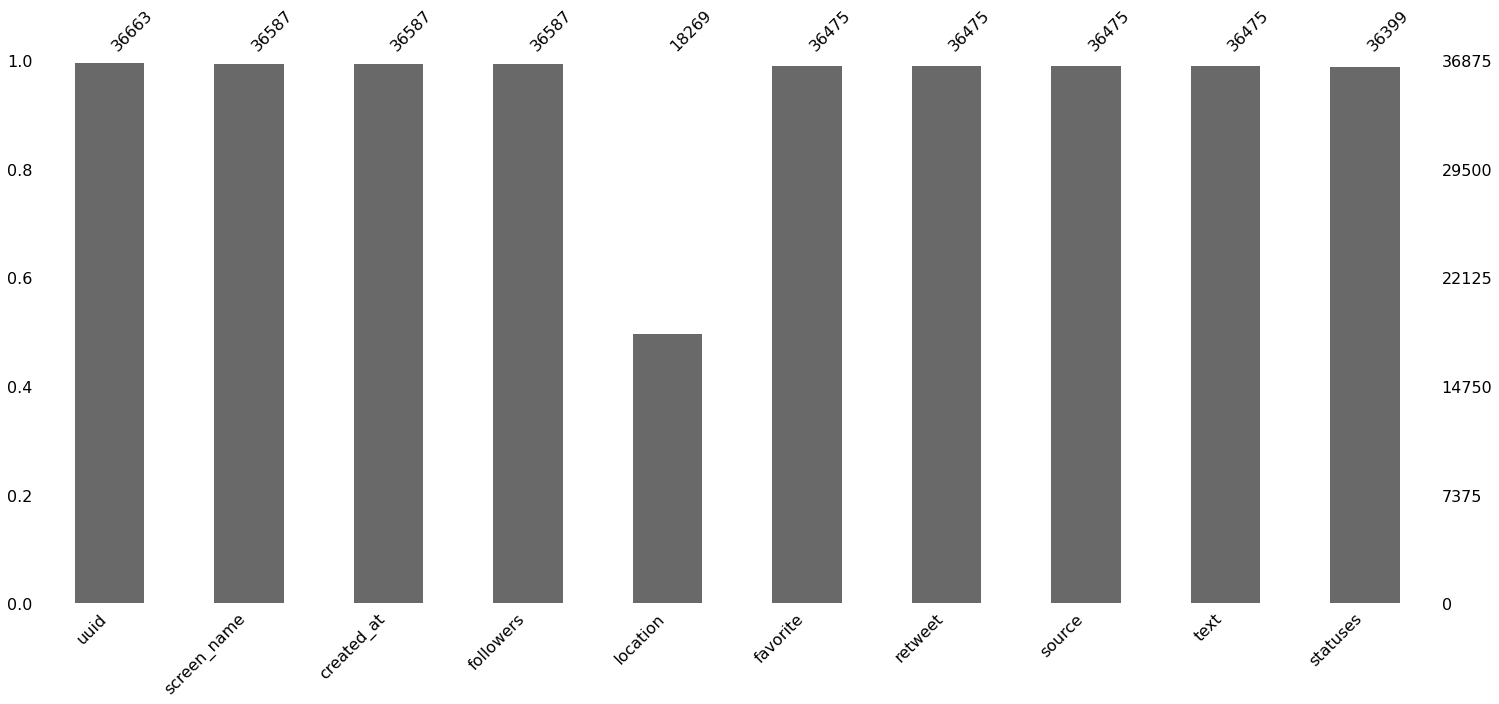

In [10]:
plt.figure(figsize=(10,6))
msno.bar(df)
plt.show()

In [11]:
df

,uuid,screen_name,created_at,followers,location,favorite,retweet,source,text,statuses
0,257bd60a-733f-11ed-8e58-cdd0cb8dba8d,BNB_Tracker,2022-12-03 14:33:29,342,NaN,2.0,0.0,Twitter Web App,#BinanceCoin price update: $BNB\n\n#BNB $291....,91973.0
1,0948f928-733d-11ed-8e58-cdd0cb8dba8d,lopp,2022-12-03 15:02:17,423104,Cyberspace,57.0,14.0,Hypefury,Software tend to either get better or get wor...,38675.0
2,ca0f5a41-7338-11ed-8e58-cdd0cb8dba8d,bitcoinrate247,2022-12-03 16:00:02,433,International,0.0,0.0,BtcApp,"Average Bitcoin market price is: USD 16,965.2...",58224.0
3,b7b3fd6b-738e-11ed-8e58-cdd0cb8dba8d,mariama_kromah,2022-12-04 03:35:59,0,NaN,0.0,0.0,Twitter Web App,Pro Bitcoin Trader: Massive Christmas Move Co...,8.0
4,10337d46-7393-11ed-8e58-cdd0cb8dba8d,CryptoDubai912,2022-12-04 04:32:46,591,UAE,1.0,0.0,WordPress.com,#Ethereum Could Fall Under Selling Pressure A...,41597.0
...,...,...,...,...,...,...,...,...,...,...
36870,9a3866a3-7332-11ed-8e58-cdd0cb8dba8d,PloomTarmo1,2022-12-03 16:51:07,23,NaN,0.0,7.0,Twitter for Android,RT @smartcredit_io: But:\n(1) miners have sol...,152.0
36871,8131ff90-7332-11ed-8e58-cdd0cb8dba8d,ARMScan,2022-12-03 17:02:06,382,NaN,0.0,19.0,Twitter for iPhone,RT @soundscape_vr: The @soundscape_vr Musical...,103772.0
36872,21d5636a-733f-11ed-8e58-cdd0cb8dba8d,BURNERA56462776,2022-12-03 14:35:15,17,NaN,0.0,0.0,"Cheap Bots, Done Quick!",DID YOU KNOW!? Secure Bitcoin on Twitter!? NOW!!,94651.0
36873,71cfa7e4-7347-11ed-8e58-cdd0cb8dba8d,brando266,2022-12-03 12:52:16,83,Helsinki,1.0,0.0,Twitter Web App,My thoughts about the Cash Rain 👇\n\nhttps://...,413.0


In [12]:
df1 = df.copy()

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36875 entries, 0 to 36874
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   uuid         36663 non-null  object 
 1   screen_name  36587 non-null  object 
 2   created_at   36587 non-null  object 
 3   followers    36587 non-null  object 
 4   location     18269 non-null  object 
 5   favorite     36475 non-null  float64
 6   retweet      36475 non-null  float64
 7   source       36475 non-null  object 
 8   text         36475 non-null  object 
 9   statuses     36399 non-null  float64
dtypes: float64(3), object(7)
memory usage: 2.8+ MB


# Xử lý null

In [14]:
df1.dropna(subset=['uuid', 'screen_name', 'created_at', 'followers', 'favorite', 'retweet', 'source', 'text', 'statuses'], inplace=True)

In [15]:
df1['location'].fillna("Others", inplace=True)

In [16]:
total = df1.isnull().sum().sort_values(ascending=False) #Tìm trong dữ liệu giá null, tính tổng chúng lại, sắp xếp theo tăng dần  = False tức là sắp giảm
percent_1=df1.isnull().sum()/df1.isnull().count()*100 #Tổng giá trị null của một cột/ số dòng của cột null đó 
percent_2 = (round(percent_1,1)).sort_values(ascending = False) #Làm tròn 1 chữ số và sort giảm dần
missing_data = pd.concat([total,percent_2],axis=1,keys=['Total','%'])
missing_data

,Total,%
uuid,0,0.0
screen_name,0,0.0
created_at,0,0.0
followers,0,0.0
location,0,0.0
favorite,0,0.0
retweet,0,0.0
source,0,0.0
text,0,0.0
statuses,0,0.0


# Chuyển đổi kiểu dữ liệu

In [17]:
df1['followers'] = df1['followers'].astype(int)
df1['favorite'] = df1['favorite'].astype(int)
df1['retweet'] = df1['retweet'].astype(int)
df1['statuses'] = df1['statuses'].astype(int)
# df1['created_at'] = pd.to_datetime(pd.to_datetime(df1['created_at']).apply(lambda x: x.strftime('%Y-%m-%d')))
df1['created_at'] = df1['created_at'].apply(lambda x: (datetime.strptime(x, '%Y-%m-%d %H:%M:%S')))
df1['created_at'] = pd.to_datetime(df1['created_at'])
df1['tweet_hour'] = df1['created_at'].apply(lambda x: x.strftime('%H'))
df1['tweet_hour'] = df1['tweet_hour'].astype(int)
df1['created_at'] = df1['created_at'].apply(lambda x: x.strftime('%Y-%m-%d'))

In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36399 entries, 0 to 36874
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   uuid         36399 non-null  object
 1   screen_name  36399 non-null  object
 2   created_at   36399 non-null  object
 3   followers    36399 non-null  int64 
 4   location     36399 non-null  object
 5   favorite     36399 non-null  int64 
 6   retweet      36399 non-null  int64 
 7   source       36399 non-null  object
 8   text         36399 non-null  object
 9   statuses     36399 non-null  int64 
 10  tweet_hour   36399 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 3.3+ MB


In [19]:
df1.head(5)

,uuid,screen_name,created_at,followers,location,favorite,retweet,source,text,statuses,tweet_hour
0,257bd60a-733f-11ed-8e58-cdd0cb8dba8d,BNB_Tracker,2022-12-03,342,Others,2,0,Twitter Web App,#BinanceCoin price update: $BNB\n\n#BNB $291....,91973,14
1,0948f928-733d-11ed-8e58-cdd0cb8dba8d,lopp,2022-12-03,423104,Cyberspace,57,14,Hypefury,Software tend to either get better or get wor...,38675,15
2,ca0f5a41-7338-11ed-8e58-cdd0cb8dba8d,bitcoinrate247,2022-12-03,433,International,0,0,BtcApp,"Average Bitcoin market price is: USD 16,965.2...",58224,16
3,b7b3fd6b-738e-11ed-8e58-cdd0cb8dba8d,mariama_kromah,2022-12-04,0,Others,0,0,Twitter Web App,Pro Bitcoin Trader: Massive Christmas Move Co...,8,3
4,10337d46-7393-11ed-8e58-cdd0cb8dba8d,CryptoDubai912,2022-12-04,591,UAE,1,0,WordPress.com,#Ethereum Could Fall Under Selling Pressure A...,41597,4


# Loại bỏ các ký tự đặc biệt trong location

In [20]:
df1[df1.location.str.contains(r'[^0-9a-zA-Z]', na=False)]

,uuid,screen_name,created_at,followers,location,favorite,retweet,source,text,statuses,tweet_hour
17,5d385791-7343-11ed-8e58-cdd0cb8dba8d,susanoftheworld,2022-12-03,68,"California, USA",0,5,Twitter for Android,RT @bemzmedia: US Senator: Bitcoin Is A Commo...,179,13
19,71cf80de-7347-11ed-8e58-cdd0cb8dba8d,chuksteak,2022-12-03,175,Mitten State,4,1,Twitter for Android,@OTC_Bitcoin Can we get a mulligan please? #B...,3293,12
20,5caaf9db-7345-11ed-8e58-cdd0cb8dba8d,desiTraveler,2022-12-03,7840,Third Rock,1,0,Twitter Web App,@Socialslack which currency ? INR ? Bitcoin ...,35262,13
23,c3036a45-738c-11ed-8e58-cdd0cb8dba8d,ampvass,2022-12-04,273,★//☆ — neocity . . 🥪,0,456,Twitter for Android,RT @bitindichain: Bitindi Chain $BNI Bridge L...,2784,3
25,f357f253-7392-11ed-8e58-cdd0cb8dba8d,akkaufman,2022-12-04,3225,"Sequim, WA",1,0,Twitter for iPhone,@parkeralewis Now tell the AI to invent a fut...,207685,1
...,...,...,...,...,...,...,...,...,...,...,...
36858,d032d301-7390-11ed-8e58-cdd0cb8dba8d,Real_Buchyo,2022-11-30,8776,Earth,0,13,Twitter for Android,RT @GuardianNigeria: These are the headlines ...,36622,5
36863,d7fa5ccb-733a-11ed-8e58-cdd0cb8dba8d,paora420nz,2022-12-03,2055,Aotearoa,0,560,Twitter for Android,RT @BitcoinMagazine: Fiat in Venezuela is so ...,20070,15
36867,13634484-733f-11ed-8e58-cdd0cb8dba8d,RustEngineer,2022-12-03,9250,"Pacific Northwest, USA",0,3,Twitter for Android,"RT @RustEngineer: ""We are in a global, macro ...",55131,14
36869,e1fa8563-7390-11ed-8e58-cdd0cb8dba8d,italianace999,2022-12-04,408,"New York, USA",0,10,Twitter for iPhone,RT @gokhshteinmedia: Global Crypto Market Cap...,14098,3


In [21]:
df1 = df1.drop(df1[df1.location.str.contains(r'[^0-9a-zA-Z]', na=False)].index)

In [22]:
df1["location"] = df1["location"].apply(lambda x: re.sub("[0-9]", "Others", x)).str.title()

In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25086 entries, 0 to 36873
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   uuid         25086 non-null  object
 1   screen_name  25086 non-null  object
 2   created_at   25086 non-null  object
 3   followers    25086 non-null  int64 
 4   location     25086 non-null  object
 5   favorite     25086 non-null  int64 
 6   retweet      25086 non-null  int64 
 7   source       25086 non-null  object
 8   text         25086 non-null  object
 9   statuses     25086 non-null  int64 
 10  tweet_hour   25086 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 2.3+ MB


In [24]:
def clean_text(text):
  text = re.sub('#[A-Za-z0-9]+', 'Bitcoin', text) #removes '#' from srings
  text = re.sub('\\n', '', text) #removes '\n' from bitcoin
  text = re.sub('RT[\s]+','',text) 
  text = re.sub('https?:\/\/\s+', '', text) #removes hyperlinks
  return text

In [25]:
df1["clean_text"] = df1["text"].apply(clean_text)

In [26]:
df1.head(5)

,uuid,screen_name,created_at,followers,location,favorite,retweet,source,text,statuses,tweet_hour,clean_text
0,257bd60a-733f-11ed-8e58-cdd0cb8dba8d,BNB_Tracker,2022-12-03,342,Others,2,0,Twitter Web App,#BinanceCoin price update: $BNB\n\n#BNB $291....,91973,14,Bitcoin price update: $BNBBitcoin $291.12 USD...
1,0948f928-733d-11ed-8e58-cdd0cb8dba8d,lopp,2022-12-03,423104,Cyberspace,57,14,Hypefury,Software tend to either get better or get wor...,38675,15,Software tend to either get better or get wor...
2,ca0f5a41-7338-11ed-8e58-cdd0cb8dba8d,bitcoinrate247,2022-12-03,433,International,0,0,BtcApp,"Average Bitcoin market price is: USD 16,965.2...",58224,16,"Average Bitcoin market price is: USD 16,965.2..."
3,b7b3fd6b-738e-11ed-8e58-cdd0cb8dba8d,mariama_kromah,2022-12-04,0,Others,0,0,Twitter Web App,Pro Bitcoin Trader: Massive Christmas Move Co...,8,3,Pro Bitcoin Trader: Massive Christmas Move Co...
4,10337d46-7393-11ed-8e58-cdd0cb8dba8d,CryptoDubai912,2022-12-04,591,Uae,1,0,WordPress.com,#Ethereum Could Fall Under Selling Pressure A...,41597,4,Bitcoin Could Fall Under Selling Pressure At ...


# Trực quan hóa dữ liệu

## Biểu đồ phân bố top 10 Source được sử dụng nhiều nhất trong Twitter

In [27]:
source_counts = df1["source"].value_counts().sort_values()[-10:]
source_counts

 dlvr.it                      110
 boto_io                      118
 Twitter for iPad             142
 IFTTT                        168
 WordPress.com                200
 Microsoft Power Platform     209
 vaiotapi                     312
 Twitter for iPhone          4390
 Twitter for Android         7672
 Twitter Web App             8801
Name: source, dtype: int64

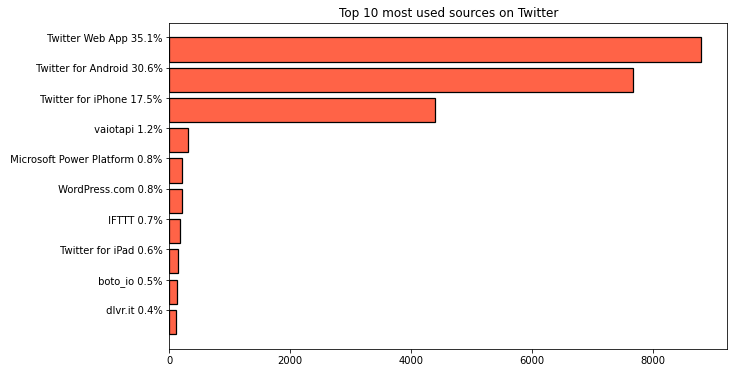

In [28]:
plt.figure(figsize=(10,6))
bottom = [index for index, item in enumerate(source_counts.index)]
plt.barh(bottom, width=source_counts, color='tomato', edgecolor = 'black',linewidth = 1.25)
y_labels = ["%s %.1f%%" % (item, 100.0*source_counts[item]/len(df1)) for index,item in enumerate(source_counts.index)]
plt.yticks(np.array(bottom)+0.4, y_labels)
plt.title("Top 10 most used sources on Twitter")
plt.show()

## Biểu đồ phân bố các giá trị của Favorite, Status, Followers và Retweet trong Twitter

In [29]:
favorite_counts = df1["favorite"].value_counts().sort_values()[-10:]
retweet_counts = df1["retweet"].value_counts().sort_values()[-10:]
status_counts = df1["statuses"].value_counts().sort_values()[-10:]
follower_counts = df1["followers"].value_counts().sort_values()[-10:]

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


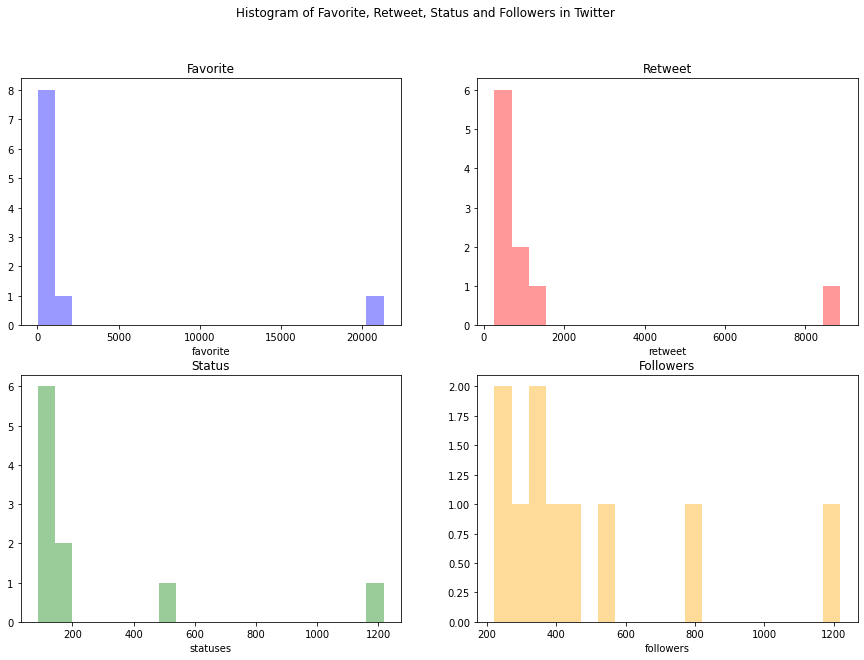

In [30]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharey=True)
fig.suptitle('Histogram of Favorite, Retweet, Status and Followers in Twitter')

plt.subplot(2,2,1)
plt.title('Favorite')
sns.distplot(favorite_counts, color='blue', kde = False, bins=20)

plt.subplot(2,2,2)
plt.title('Retweet')
sns.distplot(retweet_counts, color='red', kde = False, bins=20)

plt.subplot(2,2,3)
plt.title('Status')
sns.distplot(status_counts, color='green', kde = False, bins=20)

plt.subplot(2,2,4)
plt.title('Followers')
sns.distplot(follower_counts, color='orange', kde = False, bins=20)

plt.show()

## Biểu đồ thể hiện mật độ xác suất thống kê theo giờ dựa vào ngày tạo (created_at)

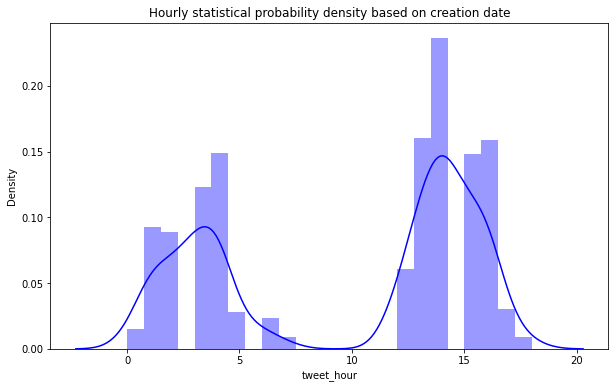

In [31]:
plt.figure(figsize=(10,6))
sns.distplot(df1['tweet_hour'], kde=True, color='blue')
plt.title("Hourly statistical probability density based on creation date")
plt.show()

## Biểu đồ kết hợp

### Biểu đồ thể hiện sự phân bố của Favorite, Retweet và Followers dựa vào ngày tạo (created_at)

In [32]:
time_series = df1[["followers", "favorite", "retweet", "created_at"]]
time_series

,followers,favorite,retweet,created_at
0,342,2,0,2022-12-03
1,423104,57,14,2022-12-03
2,433,0,0,2022-12-03
3,0,0,0,2022-12-04
4,591,1,0,2022-12-04
...,...,...,...,...
36868,300,0,0,2022-12-04
36870,23,0,7,2022-12-03
36871,382,0,19,2022-12-03
36872,17,0,0,2022-12-03


In [33]:
time_series_group = time_series.groupby( [ "created_at"] ).mean()
time_series_group

,followers,favorite,retweet
created_at,,,
2022-11-25,453.000000,0.000000,319.750000
2022-11-26,4421.000000,0.000000,319.750000
2022-11-27,453.000000,0.000000,238.000000
2022-11-28,2595.000000,0.000000,238.000000
2022-11-29,453.000000,0.000000,319.750000
2022-11-30,190659.455312,2.347386,43.886172
2022-12-02,453.000000,0.000000,334.000000
2022-12-03,3055.273123,1.139046,314.515670
2022-12-04,2572.610895,0.624081,2049.619001


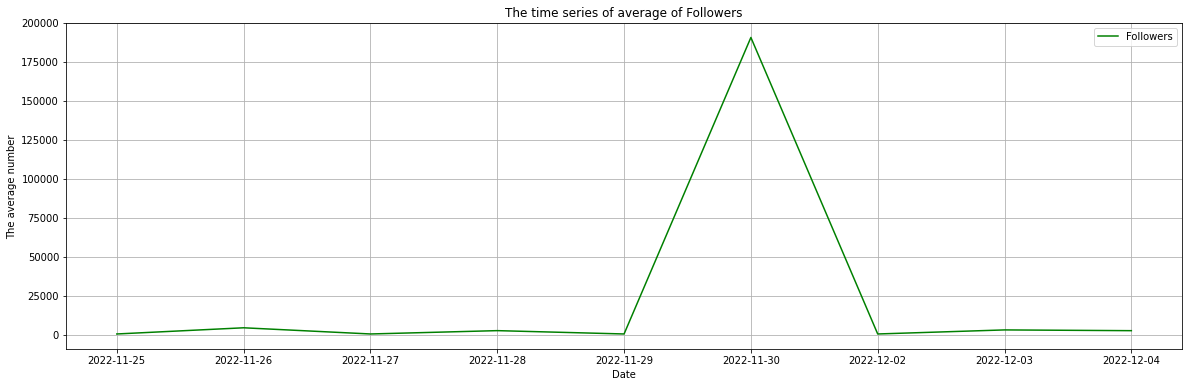

In [34]:
plt.figure(figsize=(20, 6))
plt.grid(True)
plt.title('The time series of average of Followers')
plt.xlabel('Date')
plt.ylabel('The average number')
plt.plot(time_series_group.followers, 'green', label='Followers')
plt.legend()

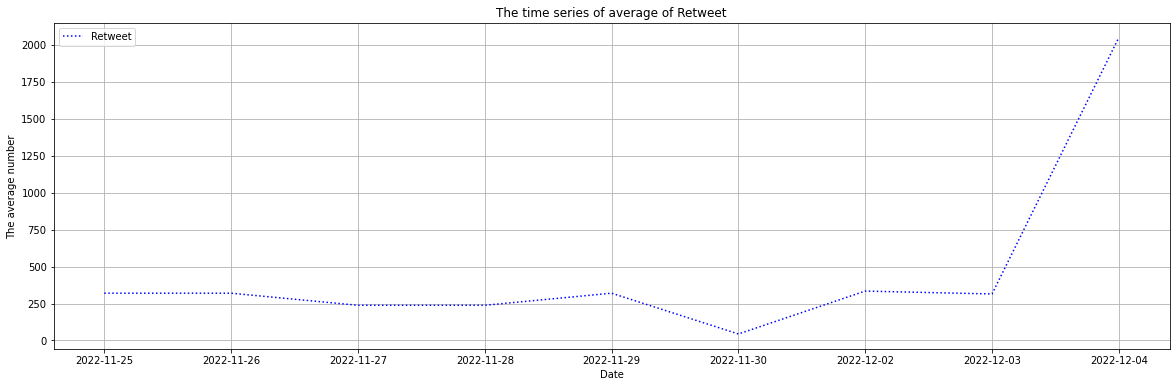

In [35]:
plt.figure(figsize=(20, 6))
plt.grid(True)
plt.title('The time series of average of Retweet')
plt.xlabel('Date')
plt.ylabel('The average number')
plt.plot(time_series_group.retweet, 'blue', label='Retweet', linestyle='dotted')
plt.legend()

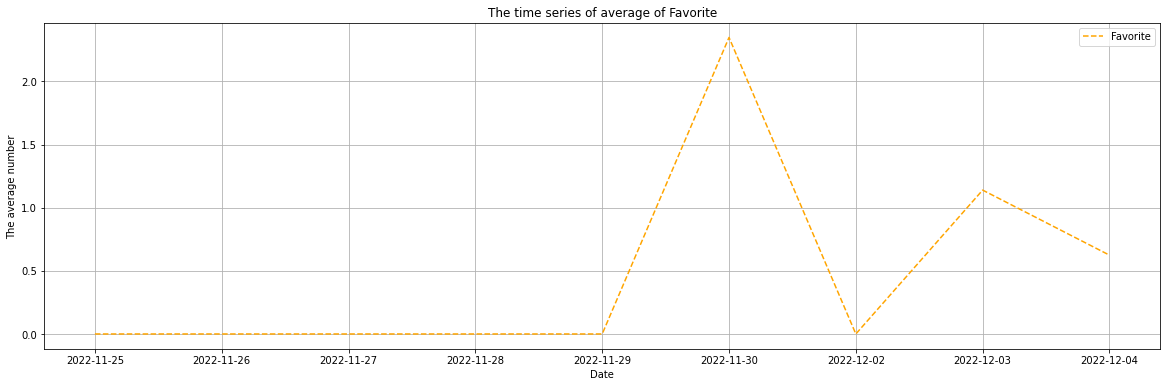

In [36]:
plt.figure(figsize=(20, 6))
plt.grid(True)
plt.title('The time series of average of Favorite')
plt.xlabel('Date')
plt.ylabel('The average number')
plt.plot(time_series_group.favorite, 'orange', label='Favorite', linestyle='dashed')
plt.legend()

### Biểu đồ phân bố của Top 10 vị trí phổ biến của các Twitters

In [37]:
twitter_location = df1['location'].value_counts().reset_index()
twitter_location.columns = ['Location', 'No of twitter']
twitter_location_top10 = twitter_location.head(10)
twitter_location_top10 

,Location,No of twitter
0,Others,18244
1,Japan,1290
2,Metaverse,398
3,Nigeria,319
4,Usa,313
5,India,210
6,Lagos,178
7,Canada,171
8,Earth,151
9,Worldwide,95


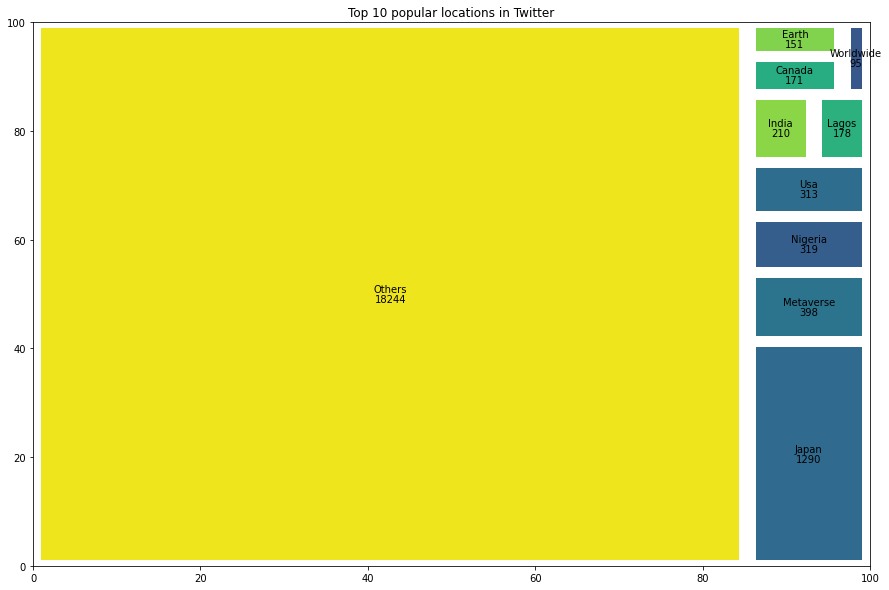

In [38]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1,1,1)
ax.set_title('Top 10 popular locations in Twitter')
squarify.plot(sizes=twitter_location_top10['No of twitter'],label=twitter_location_top10['Location'],ax=ax,pad=True,
             value=twitter_location_top10['No of twitter'])
plt.show()

## World Cloud về các text trong Twitter

In [39]:
text = " ".join(i for i in df1.text)

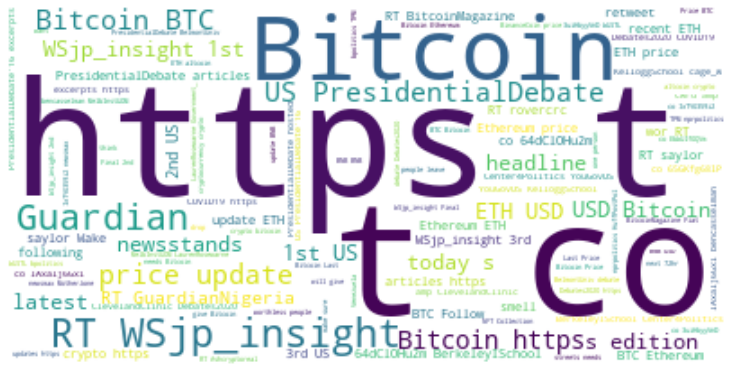

In [40]:
wc = WordCloud(background_color='white').generate(text)
plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

## Trực quan hóa dựa trên cảm xúc người dùng (Sentiment)

### Bitcoin from Twitter

In [41]:
from textblob import Word, TextBlob

In [42]:
df_bitcoin = df1[["clean_text"]]
df_bitcoin.head(5)

,clean_text
0,Bitcoin price update: $BNBBitcoin $291.12 USD...
1,Software tend to either get better or get wor...
2,"Average Bitcoin market price is: USD 16,965.2..."
3,Pro Bitcoin Trader: Massive Christmas Move Co...
4,Bitcoin Could Fall Under Selling Pressure At ...


In [43]:
# def getSubjectivity(twt):
#   # return TextBlob(twt).sentiment.getSubjectivity
#   return TextBlob(twt).sentiment.subjectivity

# def getPolarity(twt):
#   # return TextBlob(twt).sentiment.getPolarity
#   return TextBlob(twt).sentiment.polarity

# df_bitcoin["Subjectivity"] = df_bitcoin["clean_text"].apply(getSubjectivity)
# df_bitcoin["Polarity"] = df_bitcoin["clean_text"].apply(getPolarity)

In [44]:
df_bitcoin["Polarity"] = df_bitcoin['clean_text'].apply(lambda x: TextBlob(x).sentiment[0])
df_bitcoin["Subjectivity"] = df_bitcoin['clean_text'].apply(lambda x: TextBlob(x).sentiment[1])
df_bitcoin.head(5)

<ipython-input-44-eea93a40af13>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bitcoin["Polarity"] = df_bitcoin['clean_text'].apply(lambda x: TextBlob(x).sentiment[0])
<ipython-input-44-eea93a40af13>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bitcoin["Subjectivity"] = df_bitcoin['clean_text'].apply(lambda x: TextBlob(x).sentiment[1])


,clean_text,Polarity,Subjectivity
0,Bitcoin price update: $BNBBitcoin $291.12 USD...,0.000000,0.000000
1,Software tend to either get better or get wor...,0.033333,0.366667
2,"Average Bitcoin market price is: USD 16,965.2...",-0.150000,0.400000
3,Pro Bitcoin Trader: Massive Christmas Move Co...,0.175000,0.775000
4,Bitcoin Could Fall Under Selling Pressure At ...,0.000000,0.000000


In [45]:
def getSentiment(score):
  if score < 0:
    return "Negative"
  elif score == 0:
    return "Neutral"
  else:
    return "Positive"

In [46]:
df_bitcoin["Sentiment"] = df_bitcoin["Polarity"] .apply(getSentiment)
df_bitcoin.head(5)

<ipython-input-46-b2a0c51706b0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bitcoin["Sentiment"] = df_bitcoin["Polarity"] .apply(getSentiment)


,clean_text,Polarity,Subjectivity,Sentiment
0,Bitcoin price update: $BNBBitcoin $291.12 USD...,0.000000,0.000000,Neutral
1,Software tend to either get better or get wor...,0.033333,0.366667,Positive
2,"Average Bitcoin market price is: USD 16,965.2...",-0.150000,0.400000,Negative
3,Pro Bitcoin Trader: Massive Christmas Move Co...,0.175000,0.775000,Positive
4,Bitcoin Could Fall Under Selling Pressure At ...,0.000000,0.000000,Neutral


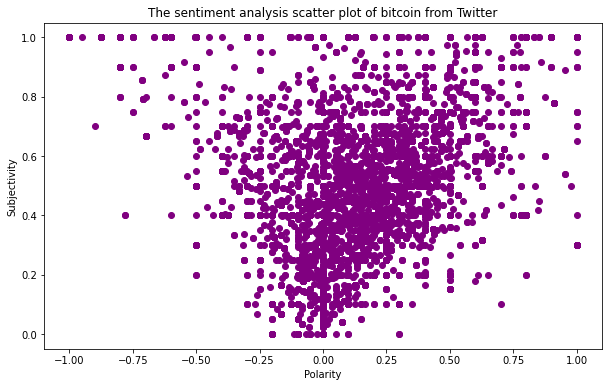

In [47]:
plt.figure(figsize=(10,6))
plt.scatter(df_bitcoin["Polarity"], df_bitcoin["Subjectivity"], color = "purple")
plt.title("The sentiment analysis scatter plot of bitcoin from Twitter")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.show()

In [48]:
bitcoin_counts = df_bitcoin["Sentiment"].value_counts()
bitcoin_counts

Neutral     14070
Positive     8083
Negative     2933
Name: Sentiment, dtype: int64

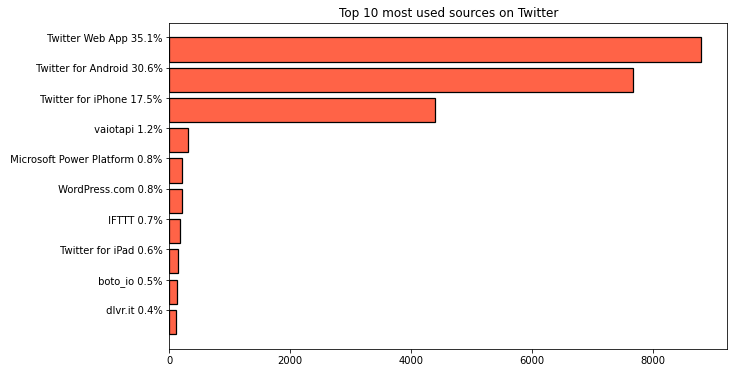

In [49]:
plt.figure(figsize=(10,6))
bottom = [index for index, item in enumerate(source_counts.index)]
plt.barh(bottom, width=source_counts, color='tomato', edgecolor = 'black',linewidth = 1.25)
y_labels = ["%s %.1f%%" % (item, 100.0*source_counts[item]/len(df1)) for index,item in enumerate(source_counts.index)]
plt.yticks(np.array(bottom)+0.4, y_labels)
plt.title("Top 10 most used sources on Twitter")
plt.show()

Text(0, 0.5, 'The number of Tweets')

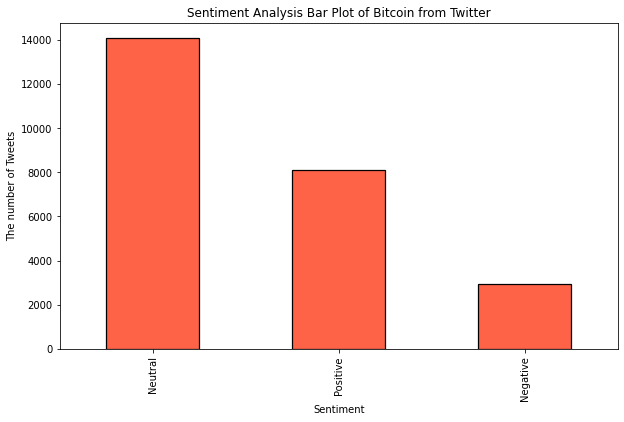

In [50]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = bitcoin_counts.plot.bar(color='tomato', edgecolor = 'black',linewidth = 1.25)
ax.set_title("Sentiment Analysis Bar Plot of Bitcoin from Twitter")
ax.set_xlabel("Sentiment")
ax.set_ylabel("The number of Tweets")

### Presidential Debate from Twitter

In [51]:
import nltk
from nltk.corpus import stopwords

In [52]:
df_trump_biden = df1[["clean_text", "created_at"]]

In [53]:
trump_refs = ["DonaldTrump", "Donald Trump", "Donald", "Trump", 'Trump\'s']
biden_refs = ["JoeBiden", "Joe Biden", "Joe", "Biden", 'Biden\'s']

In [54]:
def identify_subject(tweet, refs):
  flag = 0
  for ref in refs:
    if tweet.find(ref) != -1:
      flag = 1
  return flag

df_trump_biden["Trump"] = df_trump_biden["clean_text"].apply(lambda x: identify_subject(x, trump_refs ))
df_trump_biden["Biden"] = df_trump_biden["clean_text"].apply(lambda x: identify_subject(x, biden_refs ))
df_trump_biden.head(5)

<ipython-input-54-69cff697eab7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trump_biden["Trump"] = df_trump_biden["clean_text"].apply(lambda x: identify_subject(x, trump_refs ))
<ipython-input-54-69cff697eab7>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trump_biden["Biden"] = df_trump_biden["clean_text"].apply(lambda x: identify_subject(x, biden_refs ))


,clean_text,created_at,Trump,Biden
0,Bitcoin price update: $BNBBitcoin $291.12 USD...,2022-12-03,0,0
1,Software tend to either get better or get wor...,2022-12-03,0,0
2,"Average Bitcoin market price is: USD 16,965.2...",2022-12-03,0,0
3,Pro Bitcoin Trader: Massive Christmas Move Co...,2022-12-04,0,0
4,Bitcoin Could Fall Under Selling Pressure At ...,2022-12-04,0,0


In [55]:
nltk.download('all')
stop_words = stopwords.words('english')
custom_stopwords = ["PresidentDebate"]

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Pac

In [56]:
def preprocess_tweets(tweet, custom_stopwords):
    processed_tweet = tweet
    processed_tweet.replace('[^\w\s]', '')
    processed_tweet = " ".join(word for word in processed_tweet.split() if word not in stop_words)
    processed_tweet = " ".join(word for word in processed_tweet.split() if word not in custom_stopwords)
    processed_tweet = " ".join(Word(word).lemmatize() for word in processed_tweet.split())
    return(processed_tweet)

df_trump_biden['processed_text'] = df_trump_biden['clean_text'].apply(lambda x: preprocess_tweets(x, custom_stopwords))
df_trump_biden = df_trump_biden.loc[(df_trump_biden['Trump']==1) | (df_trump_biden['Biden']==1)]
df_trump_biden.head(5)

<ipython-input-56-6f08f1c3d455>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trump_biden['processed_text'] = df_trump_biden['clean_text'].apply(lambda x: preprocess_tweets(x, custom_stopwords))


,clean_text,created_at,Trump,Biden,processed_text
32,@hanzo_btc: @BTC_Archive @JoeNakamoto Those w...,2022-12-03,0,1,@hanzo_btc: @BTC_Archive @JoeNakamoto Those th...
389,@hodgetwins: So Vi Jayjay censored the Hunter...,2022-12-04,0,1,@hodgetwins: So Vi Jayjay censored Hunter Bide...
435,@JoeNakamoto Ethereum is dogshit.I don't know...,2022-12-04,0,1,@JoeNakamoto Ethereum dogshit.I know count hal...
721,@JoelDalais: @elonmusk @TwitterSupport - plea...,2022-12-03,0,1,@JoelDalais: @elonmusk @TwitterSupport - pleas...
1121,@JoelDalais: @elonmusk @TwitterSupport - plea...,2022-12-03,0,1,@JoelDalais: @elonmusk @TwitterSupport - pleas...


In [57]:
df_trump_biden['polarity'] = df_trump_biden['processed_text'].apply(lambda x: TextBlob(x).sentiment[0])
df_trump_biden['subjectivity'] = df_trump_biden['processed_text'].apply(lambda x: TextBlob(x).sentiment[1])
df_trump_biden[['processed_text', 'created_at', 'Biden', 'Trump', 'polarity', 'subjectivity']].head(5)


<ipython-input-57-ea67964a7551>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trump_biden['polarity'] = df_trump_biden['processed_text'].apply(lambda x: TextBlob(x).sentiment[0])
<ipython-input-57-ea67964a7551>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trump_biden['subjectivity'] = df_trump_biden['processed_text'].apply(lambda x: TextBlob(x).sentiment[1])


,processed_text,created_at,Biden,Trump,polarity,subjectivity
32,@hanzo_btc: @BTC_Archive @JoeNakamoto Those th...,2022-12-03,1,0,0.2,0.200000
389,@hodgetwins: So Vi Jayjay censored Hunter Bide...,2022-12-04,1,0,-0.7,0.666667
435,@JoeNakamoto Ethereum dogshit.I know count hal...,2022-12-04,1,0,0.0,0.000000
721,@JoelDalais: @elonmusk @TwitterSupport - pleas...,2022-12-03,1,0,0.0,0.000000
1121,@JoelDalais: @elonmusk @TwitterSupport - pleas...,2022-12-03,1,0,0.0,0.000000


In [58]:
labels_biden = ["Trump", "Biden"]
labels_trump = ["Biden", "Trump"]
colors = ['gold', 'mediumturquoise']

In [59]:
biden_count = df_trump_biden["Biden"].value_counts().sort_index()
biden_count

0    12
1    64
Name: Biden, dtype: int64

In [60]:
trump_count = df_trump_biden["Trump"].value_counts().sort_index()
trump_count

0    63
1    13
Name: Trump, dtype: int64

In [61]:
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=labels_trump, values=trump_count, name="Trump"),
              1, 1)
fig.add_trace(go.Pie(labels=labels_biden, values=biden_count, name="Biden"),
              1, 2)

fig.update_traces(hole=.4, hoverinfo="label+percent+name", textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))

fig.update_layout(
    title_text="Distribution of Trump and Biden in Presidential Debate from Twitter",
    annotations=[dict(text='Trump', x=0.18, y=0.5, font_size=20, showarrow=False),
                 dict(text='Biden', x=0.82, y=0.5, font_size=20, showarrow=False)])
fig.show()

In [62]:
biden = df_trump_biden[df_trump_biden['Biden']==1][['created_at', 'polarity']]
biden = biden.sort_values(by='created_at', ascending=True)
biden['MA Polarity'] = biden.polarity.rolling(10, min_periods=3).mean()

trump = df_trump_biden[df_trump_biden['Trump']==1][['created_at', 'polarity']]
trump = trump.sort_values(by='created_at', ascending=True)
trump['MA Polarity'] = trump.polarity.rolling(10, min_periods=3).mean()


In [63]:
biden.head(5)

,created_at,polarity,MA Polarity
32,2022-12-03,0.2000,NaN
12802,2022-12-03,0.3125,NaN
13421,2022-12-03,0.0000,0.170833
18798,2022-12-03,0.0000,0.128125
18996,2022-12-03,-0.3125,0.040000


In [64]:
trump.head(5)

,created_at,polarity,MA Polarity
3612,2022-12-03,0.000000,NaN
8032,2022-12-03,-0.500000,NaN
12592,2022-12-03,0.100000,-0.133333
15367,2022-12-03,0.000000,-0.100000
33530,2022-12-03,0.033333,-0.073333


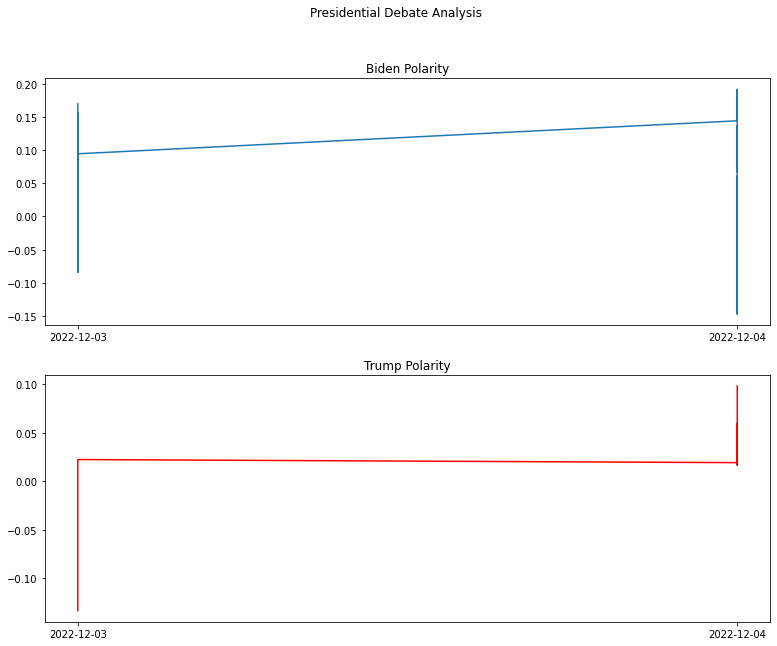

In [65]:
repub = 'red'
demo = 'blue'
fig, axes = plt.subplots(2, 1, figsize=(13, 10))

axes[0].plot(biden['created_at'], biden['MA Polarity'])
axes[0].set_title("\n".join(["Biden Polarity"]))
axes[1].plot(trump['created_at'], trump['MA Polarity'], color='red')
axes[1].set_title("\n".join(["Trump Polarity"]))

fig.suptitle("\n".join(["Presidential Debate Analysis"]), y=0.98)

plt.show()

# Dự đoán

## Xử lý

In [66]:
df_forecast = df1[df1.location.str.contains(r'[Bitcoin]', na=False)]
df_forecast.head(5)

,uuid,screen_name,created_at,followers,location,favorite,retweet,source,text,statuses,tweet_hour,clean_text
0,257bd60a-733f-11ed-8e58-cdd0cb8dba8d,BNB_Tracker,2022-12-03,342,Others,2,0,Twitter Web App,#BinanceCoin price update: $BNB\n\n#BNB $291....,91973,14,Bitcoin price update: $BNBBitcoin $291.12 USD...
1,0948f928-733d-11ed-8e58-cdd0cb8dba8d,lopp,2022-12-03,423104,Cyberspace,57,14,Hypefury,Software tend to either get better or get wor...,38675,15,Software tend to either get better or get wor...
2,ca0f5a41-7338-11ed-8e58-cdd0cb8dba8d,bitcoinrate247,2022-12-03,433,International,0,0,BtcApp,"Average Bitcoin market price is: USD 16,965.2...",58224,16,"Average Bitcoin market price is: USD 16,965.2..."
3,b7b3fd6b-738e-11ed-8e58-cdd0cb8dba8d,mariama_kromah,2022-12-04,0,Others,0,0,Twitter Web App,Pro Bitcoin Trader: Massive Christmas Move Co...,8,3,Pro Bitcoin Trader: Massive Christmas Move Co...
5,136407db-733f-11ed-8e58-cdd0cb8dba8d,Respect7752,2022-12-03,144,Others,0,27,Twitter for Android,RT @mustafaavsr54: You still have a chance to...,2566,14,@mustafaavsr54: You still have a chance to in...


In [68]:
df_forecast = df_forecast["created_at"].value_counts().sort_index().to_frame('counts')
df_forecast

,counts
2022-11-25,348
2022-11-26,348
2022-11-27,174
2022-11-28,174
2022-11-29,348
2022-11-30,1186
2022-12-02,174
2022-12-03,12599
2022-12-04,8896


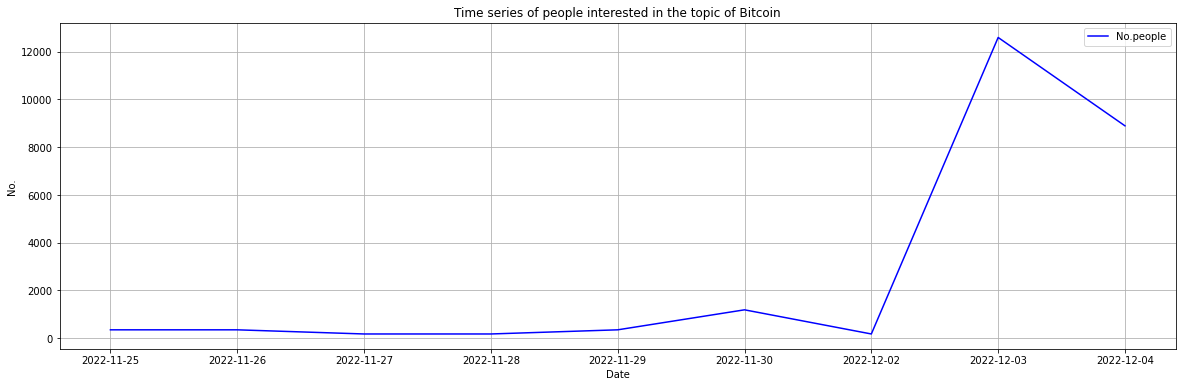

In [73]:
plt.figure(figsize=(20, 6))
plt.grid(True)
plt.title('Time series of people interested in the topic of Bitcoin')
plt.xlabel('Date')
plt.ylabel('No.')
plt.plot(df_forecast.counts, 'blue', label='No.people')
plt.legend()

In [69]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## Arima

In [70]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [71]:
from statsmodels.tsa.stattools import adfuller
from pmdarima.arima import auto_arima

In [74]:
def adf_test(series, title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    # .dropna() handles differenced data
    result = adfuller(series.dropna(), autolag='AIC')

    labels = ['ADF test statistic', 'p-value',
              'Number of lags used', 'Number of observations']
    out = pd.Series(result[0:4], index=labels)

    for key, val in result[4].items():
        out[f'critical value ({key})'] = val

    # .to_string() removes the line "dtype: float64"
    print(out.to_string())

    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non stationary")

In [75]:
adf_test(df_forecast.counts, 'Bitcoin Topic')

Augmented Dickey-Fuller Test: Bitcoin Topic
ADF test statistic        5.855817
p-value                   1.000000
Number of lags used       1.000000
Number of observations    7.000000
critical value (1%)      -4.938690
critical value (5%)      -3.477583
critical value (10%)     -2.843868
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non stationary


In [76]:
dff = df_forecast.copy()

In [77]:
dff['diff1'] = df_forecast.counts.diff()
dff.head()

,counts,diff1
2022-11-25,348,NaN
2022-11-26,348,0.0
2022-11-27,174,-174.0
2022-11-28,174,0.0
2022-11-29,348,174.0


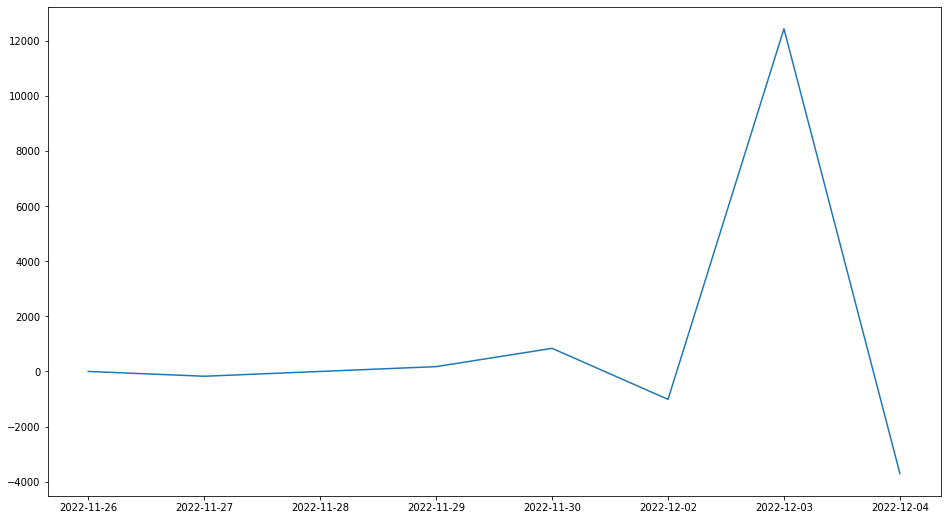

In [78]:
dff['diff1'].dropna().plot(figsize=(16, 9))

In [79]:
adf_test(dff['diff1'], 'Bitcoin Topic at First Difference')

Augmented Dickey-Fuller Test: Bitcoin Topic at First Difference
ADF test statistic        1.703217
p-value                   0.998136
Number of lags used       2.000000
Number of observations    5.000000
critical value (1%)      -6.045114
critical value (5%)      -3.929280
critical value (10%)     -2.986810
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non stationary


In [80]:
dff['diff2'] = dff['diff1'].diff()
dff.head()

,counts,diff1,diff2
2022-11-25,348,NaN,NaN
2022-11-26,348,0.0,NaN
2022-11-27,174,-174.0,-174.0
2022-11-28,174,0.0,174.0
2022-11-29,348,174.0,174.0


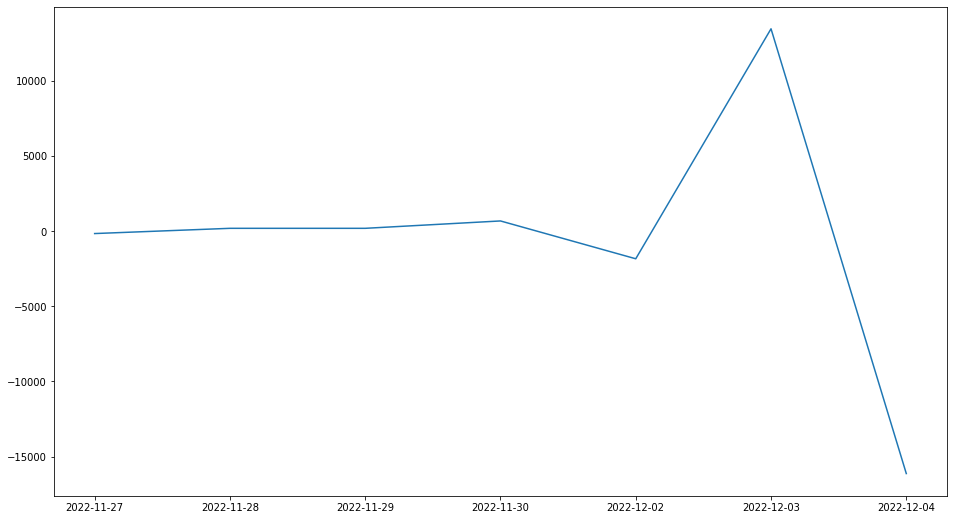

In [81]:
dff['diff2'].dropna().plot(figsize=(16, 9))

In [82]:
adf_test(dff['diff2'], 'Bitcoin Topic at First Difference')

Augmented Dickey-Fuller Test: Bitcoin Topic at First Difference
ADF test statistic       -6.466837e+00
p-value                   1.398454e-08
Number of lags used       0.000000e+00
Number of observations    6.000000e+00
critical value (1%)      -5.354256e+00
critical value (5%)      -3.646238e+00
critical value (10%)     -2.901198e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [83]:
def arima_model(ts_data):
    fit_model = auto_arima(ts_data, test='adf', seasonal=False, trace=True)
    print(fit_model.summary())
    return fit_model

In [84]:
fitted = arima_model(df_forecast)
fitted.summary()

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=143.558, Time=0.46 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=149.602, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=147.644, Time=0.03 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.35 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=145.198, Time=0.50 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=143.124, Time=0.13 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.31 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=144.776, Time=0.21 sec
 ARIMA(0,2,2)(0,0,

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                    9
Model:               SARIMAX(1, 2, 1)   Log Likelihood                 -68.562
Date:                Sun, 04 Dec 2022   AIC                            143.124
Time:                        14:30:41   BIC                            142.961
Sample:                             0   HQIC                           141.118
                                  - 9                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0000      4.635     -0.216      0.829     -10.085       8.085
ma.L1         -0.2889      6.206     -0.047      0.963     -12.452      11.874
sigma2      1.881e+07   1.72e+07      1.093      0.274   -1.49e+07    5.25e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.58   Jarque-Bera (JB):                 5.56
Prob(Q):                              0.45   Prob(JB):                         0.06
Heteroskedasticity (H):             465.13   Skew:                             1.95
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [86]:
pred_arima = fitted.predict(1)
pred_arima

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



9    21153.568191
dtype: float64

## Linear Regression

In [131]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

In [123]:
df_lr = df_forecast.copy()
df_lr.head(5)

,counts
2022-11-25,348
2022-11-26,348
2022-11-27,174
2022-11-28,174
2022-11-29,348


In [124]:
test_lr = df_lr.reset_index()
test_lr['created_at'] = pd.to_datetime(test_lr['index']).apply(pd.DateOffset(1))
test_lr = test_lr.drop(['index', 'counts'], axis=1).set_index('created_at')
test_lr = test_lr.tail(1)
test_lr 

/usr/local/lib/python3.8/dist-packages/pandas/core/apply.py:1098: FutureWarning:

DateOffset.__call__ is deprecated and will be removed in a future version.  Use `offset + other` instead.



""
created_at
2022-12-05


In [125]:
df_lr['Timestamp'] = pd.to_datetime(df_lr.index).astype(np.int64)
df_lr.head(5)

<ipython-input-125-82cd48ac1cf2>:1: FutureWarning:

casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.



,counts,Timestamp
2022-11-25,348,1669334400000000000
2022-11-26,348,1669420800000000000
2022-11-27,174,1669507200000000000
2022-11-28,174,1669593600000000000
2022-11-29,348,1669680000000000000


In [126]:
test_lr['Timestamp'] = pd.to_datetime(test_lr.index).astype(np.int64)
test_lr

<ipython-input-126-923a724c3bb6>:1: FutureWarning:

casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.



,Timestamp
created_at,
2022-12-05,1670198400000000000


In [127]:
X_train = df_lr['Timestamp'].values.reshape(-1, 1)
y_train = df_lr['counts'].values.reshape(-1, 1)

In [128]:
X_test = test_lr['Timestamp'].values.reshape(-1, 1)

In [133]:
parameters = {'fit_intercept':[True,False],  'copy_X':[True, False]}
grid_lr = GridSearchCV(LinearRegression(),parameters, scoring='r2', cv=None).fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:969: UserWarning:

One or more of the test scores are non-finite: [nan nan nan nan]



In [135]:
pred_lr = grid_lr.predict(X_test)
pred_lr

array([[8753.45416667]])

## Support Vector Machine

In [136]:
from sklearn.svm import SVR

In [139]:
parameters = {'kernel':['sigmoid', 'rbf'],  
              'C':np.arange(0.1, 0.2, 0.1),
              'gamma':np.arange(0.1, 5, 0.1)
              }
grid_svr = GridSearchCV(SVR(),parameters, scoring='r2', cv=None).fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConv

In [140]:
pred_svr = grid_svr.predict(X_test)
pred_svr

array([348.])